In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Train data:",len(X_train))
print("Test data:",len(X_test))

Train data: 60000
Test data: 10000


In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

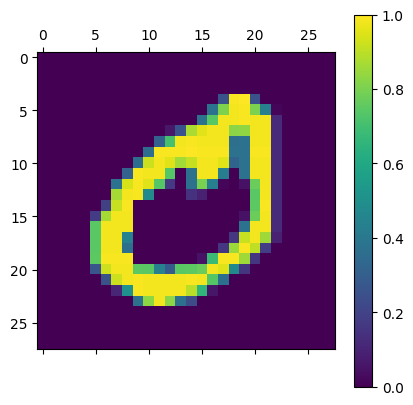

In [7]:
plt.matshow(X_train[21])
plt.colorbar()
plt.show()

In [8]:
y_train[21]

0

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
X_train_flat = X_train.reshape(len(X_train),-1)
X_test_flat = X_test.reshape(len(X_test),-1)
X_train_flat.shape

(60000, 784)

In [11]:
model1 = keras.Sequential([keras.layers.Dense(units=10, input_shape=(X_train_flat.shape[1],), activation='softmax')])
model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(X_train_flat, y_train, epochs=8, verbose=1)

c:\Users\Jayaram H\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8121 - loss: 0.7237
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9132 - loss: 0.3148
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9202 - loss: 0.2866
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9225 - loss: 0.2761
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.9264 - loss: 0.2642
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9277 - loss: 0.2639
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9281 - loss: 0.2623
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9302 - loss: 0.2460


In [12]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,552 (92.00 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,702 (61.34 KB)

In [13]:
model1.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9135 - loss: 0.3085


[0.2725663483142853, 0.9240999817848206]

In [14]:
model2 = keras.Sequential()

model2.add(keras.layers.Input(shape=(X_test_flat.shape[1],)))
#model.add(keras.layers.Activation('relu'))
#model2.add(keras.layers.Dense(X_test_flat.shape[1]))
#model2.add(keras.layers.Activation('sigmoid'))
model2.add(keras.layers.Dense(500))
model2.add(keras.layers.Activation('relu'))
model2.add(keras.layers.Dense(10))
model2.add(keras.layers.Activation('softmax'))

model2.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train_flat, y_train, epochs=8, verbose=1)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8979 - loss: 0.3476
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9752 - loss: 0.0813
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0530
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0325
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9925 - loss: 0.0259
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9946 - loss: 0.0180
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0150
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9959 - loss: 0.0118


In [15]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,192,532 (4.55 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 795,022 (3.03 MB)

In [16]:
model2.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.1012


[0.08196834474802017, 0.9782000184059143]

In [17]:
#model.evaluate(X_test_flat,y_test)

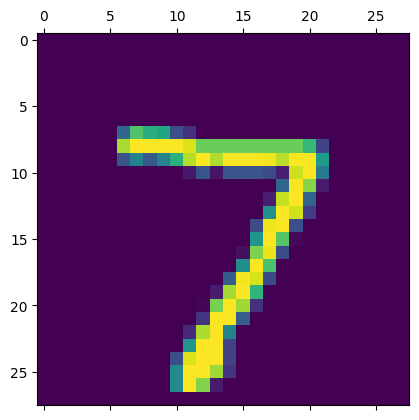

In [18]:
plt.matshow(X_test[0])

In [19]:
y_pred1 = model1.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


In [20]:
y_pred1[0].argmax()

7

In [21]:
y_pred2 = model2.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step


In [22]:
y_pred2[0].argmax()

7

In [23]:
y_pred_labels1 = [np.argmax(i) for i in y_pred1]
print(y_pred_labels1[:5])

y_pred_labels2 = [np.argmax(i) for i in y_pred2]
print(y_pred_labels2[:5])

[7, 2, 1, 0, 4]
[7, 2, 1, 0, 4]


In [24]:
cm1 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    5,    2,    2,    2,    0],
       [   0, 1112,    3,    3,    0,    1,    3,    2,   11,    0],
       [   8,   18,  901,   18,    7,    5,   11,    9,   52,    3],
       [   3,    0,   14,  922,    1,   22,    1,   10,   30,    7],
       [   2,    1,    6,    2,  915,    0,    4,    4,   10,   38],
       [  10,    3,    1,   37,   11,  763,   11,    9,   40,    7],
       [  15,    3,    7,    2,    8,   16,  900,    2,    5,    0],
       [   2,    6,   19,    7,    7,    0,    0,  949,    3,   35],
       [   7,   10,    4,   16,    9,   17,    6,    9,  887,    9],
       [  11,    7,    1,    8,   28,    4,    0,   17,    8,  925]])>

In [25]:
cm2 = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    1,    2,    0,    1,    1,    1,    2,    2],
       [   0, 1126,    3,    0,    0,    1,    2,    0,    3,    0],
       [   3,    2, 1012,    3,    2,    1,    1,    5,    2,    1],
       [   0,    0,    5,  996,    0,    7,    0,    1,    1,    0],
       [   2,    0,    4,    1,  965,    0,    3,    1,    0,    6],
       [   2,    0,    0,    8,    1,  878,    1,    0,    1,    1],
       [   8,    2,    0,    1,    2,    7,  937,    0,    1,    0],
       [   2,    4,   19,    8,    0,    0,    0,  985,    5,    5],
       [   3,    0,    3,   12,    6,    7,    0,    2,  937,    4],
       [   2,    2,    0,   11,   11,    4,    0,    2,    0,  977]])>

Text(95.72222222222221, 0.5, 'Actual')

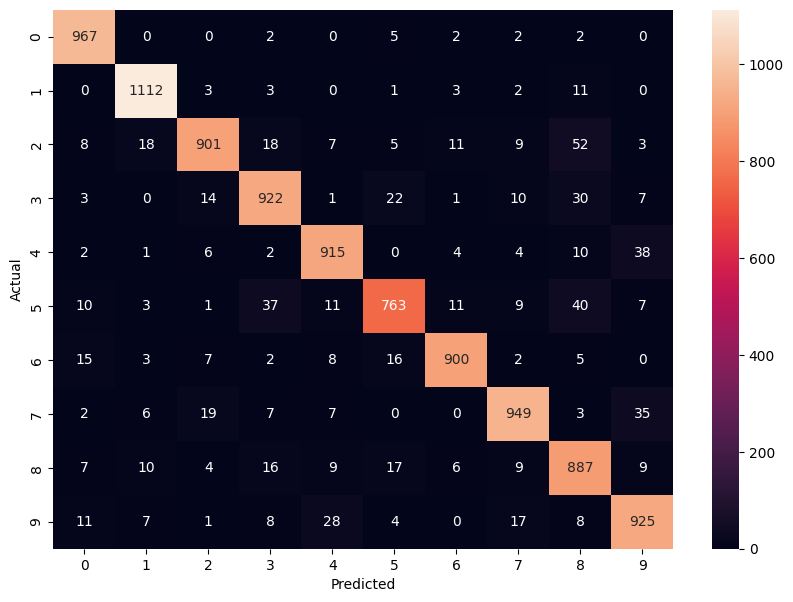

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm1,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(95.72222222222221, 0.5, 'Actual')

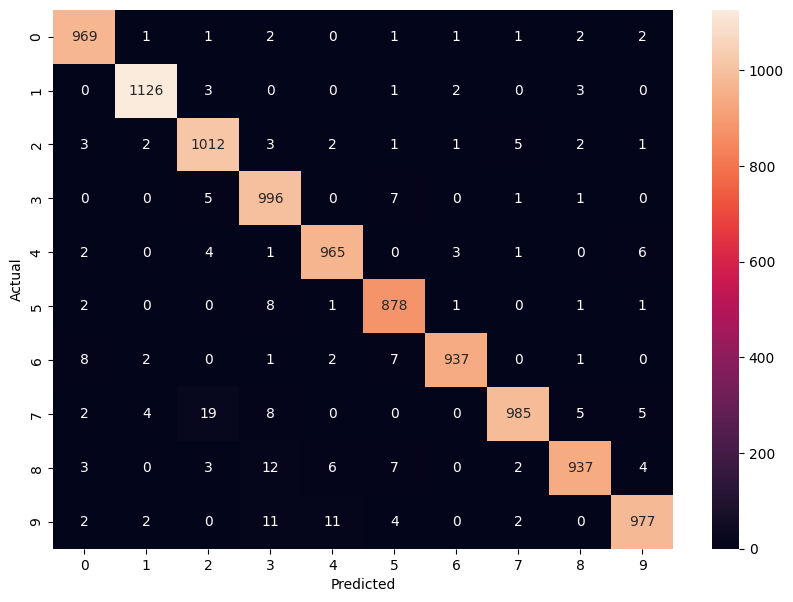

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm2,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')